# Video Game Markert Analyzation 

_Group members: Godwin Karngong, Temi Tunj, Franklin Nkokam Ngongang_

## Introduction

This tutorial will introduce some methods for analyzing marketing data and making visualizations based on the data in order for people to have a better view and understanding of the data. Data Visualization is both an art and a science. The primary goal is to presenting information more clearly and efficiently through statistical graphics, plots and information graphics. It helps to make a complex numerical data more readable, understandable and usable for people. Different types of data visualization would allow people to see different patterns and relationships in the data between one or more variables. Here, we will show how to process data visualization and predicting future trend by analyzing the video game marketing data set, 'Video Games Sales as at 22 Dec 2016'.

## Read Dataset and Modify

The first step of doing analysis of a set of data is to read it and adjust errors, such as missing data. In order to get a more precise and accurate analysis result, this step is important. The following would be steps that how to process and modify a dataset in python.

#### Step 1. reading files and scraping data:

In [21]:
# load csv file into Pandas and make a dataframe:
import csv
import pandas as pd
import numpy as np
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 2. Tidy the dataframe:

During this step, we adjust the missing type of data and add more information that might be useful for analyzation later. In this dataset, three types of meaningless data are found: N/A, Unknown, tbd.

In [22]:
# convert to missing data
sentinels = {'Year_of_Release': ['N/A'], 'Publisher': ['Unknown'], 'User_Score':['tbd']}
df2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv' )
df2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv',na_values=sentinels)

## Now all the meaning less data has beem converted to missing data.

# re-index
df2.index+=1

In [23]:
# Add a ranking property(column) to dataframe

total_rows = df.shape[0]
rank = range(1, total_rows+1)

# insert Rank Column at the front of the dataframe
df2.insert(0, 'Rank', rank)

All the sales numbers in dataframe are in millions of units, so we can add the unit, "million", after those column names for calrification.

In [24]:
# Change the columns name

df2 = df2.rename(columns={'NA_Sales':'NA_Sales_million','EU_Sales':'EU_Sales_million','JP_Sales':'JP_Sales_million'\
                         ,'Other_Sales':'Other_Sales_million','Global_Sales':'Global_Sales_million'})

Here, we adjust year of release since the type Nan is found. There is no way to do this in panda sense since there are two type of value: float and NaN. NaN can't be convert to int. To solve this problem, missing data is set to -1. 

In [25]:
## Step4: Change the float value to integer in column "Year_of_Release"

df2[pd.isnull(df2['Year_of_Release'])] = -1
df2['Year_of_Release']=df2['Year_of_Release'].astype(int)
origin_df = df2.copy()
origin_df.head()

,Rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales_million,EU_Sales_million,JP_Sales_million,Other_Sales_million,Global_Sales_million,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization and Analyzation

In this part, we will be doing 

### Example 1. Amount Percentage of different genre of games launched on PS4, Wii, X360, and PC after 2013

To make a visualization for each platform, it is necessary to create data table for each platform at first place.

In [26]:
import matplotlib.pyplot as plt

# get game amount by summing up game names
t1=df2.groupby('Platform').get_group('PS4')
t1=t1[t1['Year_of_Release'] >= 2013]

t2=df2.groupby('Platform').get_group('Wii')
t2=t2[t2['Year_of_Release'] >= 2013]

t3=df2.groupby('Platform').get_group('X360')
t3=t3[t3['Year_of_Release'] >= 2013]

t4=df2.groupby('Platform').get_group('PC')
t4=t4[t4['Year_of_Release'] >= 2013]

In order to make the users find each genre of games more easily, we assign different colors to each genre of games.

In [27]:
coldic = {'Action' : "b", 'Role-Playing' : "#55cc30", 'Sports' : "r", 'Shooter' : "#ff0090", 'Adventure' : "m",
          'Misc' : "y", 'Racing' : '#ffa035', 'Fighting' : '#ddddd7', 'Strategy' : "#fffa00", 'Platform' : '#31f1e8',
          'Simulation' : '#567753', 'Puzzle' : '#421111' } 

After the steps above done, information that is needed for the graph is obtained and it is time to make and show the visualization. In this example, pie graphs would be used as it shows the proportion of each genre's released game more clearly.

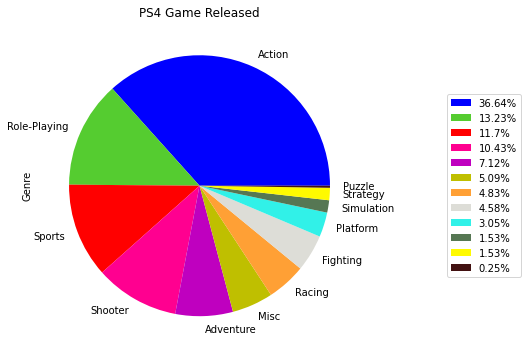

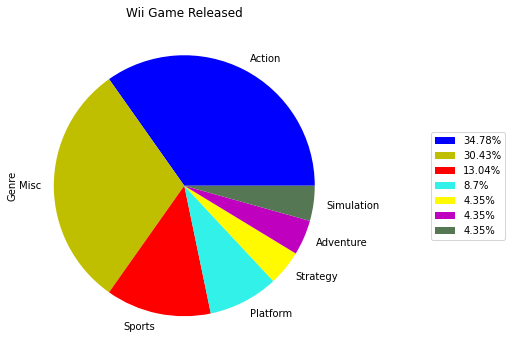

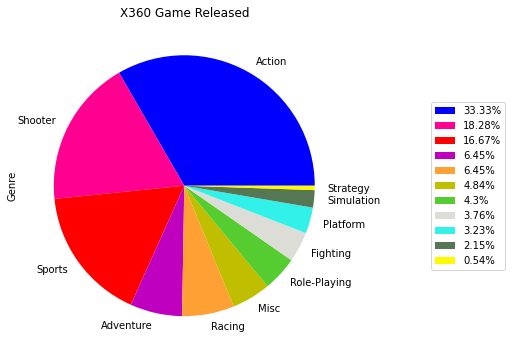

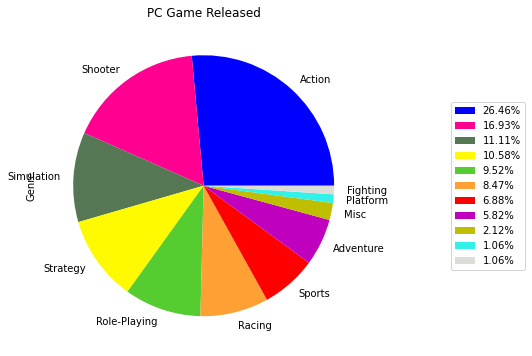

In [28]:
color1 = []
percent1 = []
t1_genre = t1['Genre'].value_counts()
for i in range(t1_genre.shape[0]):
    color1.append(coldic[t1_genre.index[i]])
    percent1.append(str(round(t1_genre[i]/t1_genre.sum()*100, 2))+"%")
t1_genre.plot.pie(figsize=(6, 6), title ='PS4 Game Released', colors=color1)

#add legend for more details
plt.legend(labels = percent1, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

# graphs for Wii, x360 and PC are made with the same steps above
color2 = []
percent2 = []
t2_genre = t2['Genre'].value_counts()
for i in range(t2_genre.shape[0]):
    color2.append(coldic[t2_genre.index[i]])
    percent2.append(str(round(t2_genre[i]/t2_genre.sum()*100, 2))+"%")
t2_genre.plot.pie(figsize=(6, 6), title ='Wii Game Released', colors=color2)
plt.legend(labels = percent2, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

color3 = []
percent3 = []
t3_genre = t3['Genre'].value_counts()
for i in range(t3_genre.shape[0]):
    color3.append(coldic[t3_genre.index[i]])
    percent3.append(str(round(t3_genre[i]/t3_genre.sum()*100, 2))+"%")
t3_genre.plot.pie(figsize=(6, 6), title ='X360 Game Released', colors=color3)
plt.legend(labels = percent3, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

color4 = []
percent4 = []
t4_genre = t4['Genre'].value_counts()
for i in range(t4_genre.shape[0]):
    color4.append(coldic[t4_genre.index[i]])
    percent4.append(str(round(t4_genre[i]/t4_genre.sum()*100, 2))+"%")
t4_genre.plot.pie(figsize=(6, 6), title ='PC Game Released', colors=color4)
plt.legend(labels = percent4, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

By presenting a pie graph, it is easier to see the genre of the games which the four different gaming platform are focusing on releasing. By assigning color to each genre of the graph, it is more efficient to track the number of the games of one single genre of game on each platform. The legend on the right hand provides the proportion of each genre on each platform. Besides, the data of each platform is ordered by the number of games released in each genre. Through this process, it is more obvious to see how each genre of game weighs on each platform. Below, some conclusions, which people can get from the pie graph, are listed:

   1. Action game is the largest part in all 4 platforms.
   2. Wii and X360 has a relatively large part of Sports game, but PC's Sports game is a small part of PC games
   3. PC and X360's Shooter game has a relatively large weight, but Wii's doesn't have any Shooter game launched after 2013.
   4. PS4 and PC both have a relatively large Role-Playing game but Wii and X360 looks didn't focus on Role-Playing game.
   5. Adventure and Racing game have moderate weight in all 4 Platforms.
   6. Only PC Platform have a large weight of Simulation game and Strategy game.
   7. Wii has much less type of game launched after 2013.

### Example 2. Sales Percentage of different genre of games launched on PS4

In this example, we are doing the same thing as example 1 instead that here the global sales proportion for each genre is calculated. This example presents how we can examine different aspects of the market by using same visualization.

In [29]:
sale_table1 = pd.DataFrame({'Genre' : t1_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t1['Global_Sales_million'].sum()
for i in range(t1_genre.shape[0]):
    sale_table1.set_value(i, 'Sales', t1.loc[t1['Genre'] == t1_genre.index[i], 'Global_Sales_million'].sum())
    sale_table1.loc[sale_table1.Genre == t1_genre.index[i], 'Color'] = coldic[t1_genre.index[i]]
    sale_table1.loc[sale_table1.Genre == t1_genre.index[i], 'Percent'] = str(round(sale_table1.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table1 = sale_table1.sort_values(by='Sales', ascending=False)

sale_table1.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'PS4 Sales', colors=sale_table1['Color'].values)
plt.legend(labels = sale_table1.Genre+' '+sale_table1.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

sale_table2 = pd.DataFrame({'Genre' : t2_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t2['Global_Sales_million'].sum()
for i in range(t2_genre.shape[0]):
    sale_table2.set_value(i, 'Sales', t2.loc[t2['Genre'] == t2_genre.index[i], 'Global_Sales_million'].sum())
    sale_table2.loc[sale_table2.Genre == t2_genre.index[i], 'Color'] = coldic[t2_genre.index[i]]
    sale_table2.loc[sale_table2.Genre == t2_genre.index[i], 'Percent'] = str(round(sale_table2.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table2 = sale_table2.sort_values(by='Sales', ascending=False)

sale_table2.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'Wii Sales', colors=sale_table2['Color'].values)
plt.legend(labels = sale_table2.Genre+' '+sale_table2.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

sale_table3 = pd.DataFrame({'Genre' : t3_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t3['Global_Sales_million'].sum()
for i in range(t3_genre.shape[0]):
    sale_table3.set_value(i, 'Sales', t3.loc[t3['Genre'] == t3_genre.index[i], 'Global_Sales_million'].sum())
    sale_table3.loc[sale_table3.Genre == t3_genre.index[i], 'Color'] = coldic[t3_genre.index[i]]
    sale_table3.loc[sale_table3.Genre == t3_genre.index[i], 'Percent'] = str(round(sale_table3.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table3 = sale_table3.sort_values(by='Sales', ascending=False)

sale_table3.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'X360 Sales', colors=sale_table3['Color'].values)
plt.legend(labels = sale_table3.Genre+' '+sale_table3.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

sale_table4 = pd.DataFrame({'Genre' : t4_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t4['Global_Sales_million'].sum()
for i in range(t4_genre.shape[0]):
    sale_table4.set_value(i, 'Sales', t4.loc[t4['Genre'] == t4_genre.index[i], 'Global_Sales_million'].sum())
    sale_table4.loc[sale_table4.Genre == t4_genre.index[i], 'Color'] = coldic[t4_genre.index[i]]
    sale_table4.loc[sale_table4.Genre == t4_genre.index[i], 'Percent'] = str(round(sale_table4.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table4 = sale_table4.sort_values(by='Sales', ascending=False)

sale_table4.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'PC Sales', colors=sale_table4['Color'].values)
plt.legend(labels = sale_table4.Genre+' '+sale_table4.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'set_value'

By comparing the Game Released Graph from example 1, it is obvious to see that global sales has no relationship with number of game released.  For example, shooter games do not count as a big portion of PS4’s released games, but it is second most popular genre of game selling on PS4.

### Example 3. Find some insights from the large part of Action game after 2013

In this example, we will be focusing on games on PlayStation platform only, which are PS2, PS3, and PS4. We will be analyzing marketing trends and aspects with the relationships between different variables. Different graphs would be used while analyzing different assumptions and hypothesis. The purpose is to find out what variable determines the global game sales on PlayStation platforms. This example will show how to present data and analyze it with different visualizations.

### Step 1: Find the weight of different genre of game from PS2 to PS3 to PS4 by using pie-chart

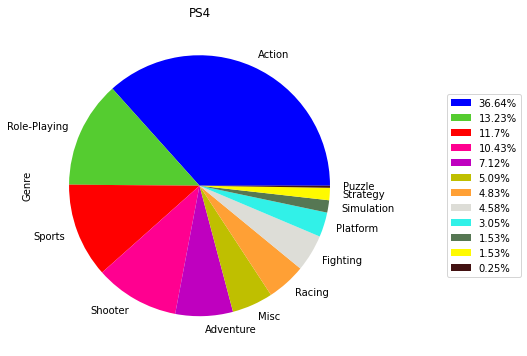

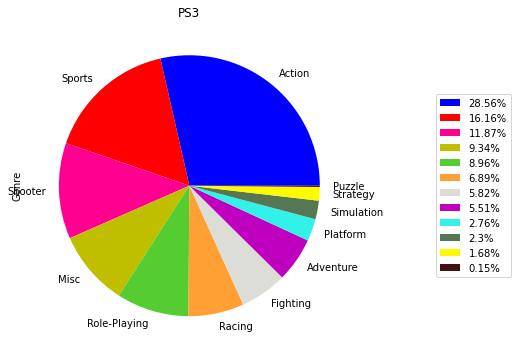

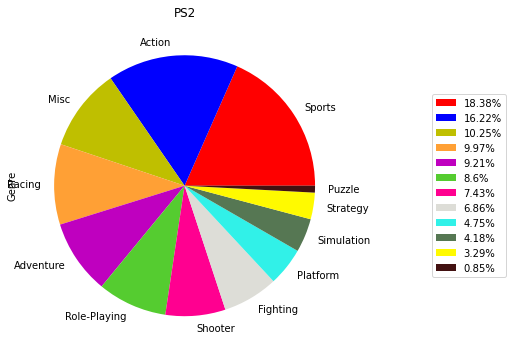

In [30]:
color1 = []
percent1 = []
t1_genre = t1['Genre'].value_counts()
for i in range(t1_genre.shape[0]):
    color1.append(coldic[t1_genre.index[i]])
    percent1.append(str(round(t1_genre[i]/t1_genre.sum()*100, 2))+"%")
t1_genre.plot.pie(figsize=(6, 6), title ='PS4', colors=color1)
plt.legend(labels = percent1, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

t5=df2.groupby('Platform').get_group('PS3')

t5[t5['Year_of_Release'] <=2013]

color5 = []
percent5 = []
t5_genre = t5['Genre'].value_counts()
for i in range(t5_genre.shape[0]):
    color5.append(coldic[t5_genre.index[i]])
    percent5.append(str(round(t5_genre[i]/t5_genre.sum()*100, 2))+"%")
t5_genre.plot.pie(figsize=(6, 6), title ='PS3', colors=color5)
plt.legend(labels = percent5, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

t6=df2.groupby('Platform').get_group('PS2')

t6[t6['Year_of_Release'] <=2006]

color6 = []
percent6 = []
t6_genre = t6['Genre'].value_counts()
for i in range(t6_genre.shape[0]):
    color6.append(coldic[t6_genre.index[i]])
    percent6.append(str(round(t6_genre[i]/t6_genre.sum()*100, 2))+"%")
t6_genre.plot.pie(figsize=(6, 6), title ='PS2', colors=color6)
plt.legend(labels = percent6, loc='center right',  bbox_to_anchor=(1.5, 0.5))
plt.show()

From the three graphs above, we can conclude that the weight of action games has increased from PS2 to PS4, and the weight of sports game has gone down. 

### Step 2: To show the weight changing motion more directly by using line-chart

In this step, we present the same data above with line chart. 

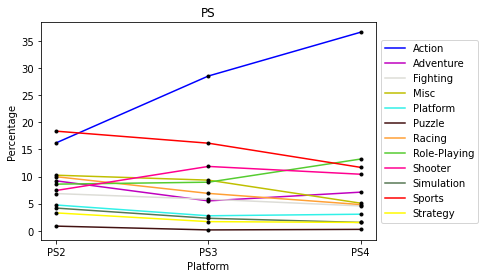

In [31]:
tempDF=pd.DataFrame(columns=['Platform','Genre','Percentage','Color'])

for i in range(0,len(color6)):
    tempDF.loc[len(tempDF)]=[1,list(coldic.keys())[list(coldic.values()).index(color6[i])],float(percent6[i].strip('%')),color6[i]] 
for i in range(0,len(color5)):
    tempDF.loc[len(tempDF)]=[2,list(coldic.keys())[list(coldic.values()).index(color5[i])],float(percent5[i].strip('%')),color5[i]] 
for i in range(0,len(color1)):
    tempDF.loc[len(tempDF)]=[3,list(coldic.keys())[list(coldic.values()).index(color1[i])],float(percent1[i].strip('%')),color1[i]] 

#construct and show the line plot graph

fig, ax = plt.subplots()

labels = []

#construct line grpah for each genre
for key, grp in tempDF.groupby(['Genre']):
    ax = grp.plot(ax=ax, kind='line', x='Platform', y='Percentage',color=grp['Color'].values[0])
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


#show all Genre's graph with plots
plt.plot(tempDF['Platform'].values, tempDF['Percentage'].values ,'.', c = 'black')
plt.xlabel("Platform")
plt.ylabel("Percentage")
plt.title("PS")

LABELS = ["PS2", "PS3", "PS4"]
plt.xticks([1,2,3], LABELS)
plt.show()

With the line chart, it is more obvious and clear to see the trend of released game amount on PlayStation platforms. The amount of released action games has increased by about 20 percent while the amount of sports has dropped by around 8 percent. With pie graph, proportion of each genre is better presented. With line chart, the trend of each genre is more recognizable for people to see.

### Step 3: Analyzing Variables that affect Global Sales

In this step, we will be focusing on global sales weight of PlayStation games. Our goal is to find the effects of other variables on the global sales weight. The following would be the hypothesis and assumptions we have made for testing:

   *  the relationship between critic score and its global sales weight is positive.
   *  the relationship between user score and its global sales weight is positive.  

To test the assumptions, we restrict our target to the shooter games since we figure out that the proportion on the global sales weight for shooter game has increased over time on PlayStation platforms. The pie graphs below provide the global sales weight each genre has taken on PlayStation platforms.

In [32]:
sale_table1 = pd.DataFrame({'Genre' : t1_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t1['Global_Sales_million'].sum()
for i in range(t1_genre.shape[0]):
    sale_table1.set_value(i, 'Sales', t1.loc[t1['Genre'] == t1_genre.index[i], 'Global_Sales_million'].sum())
    sale_table1.loc[sale_table1.Genre == t1_genre.index[i], 'Color'] = coldic[t1_genre.index[i]]
    sale_table1.loc[sale_table1.Genre == t1_genre.index[i], 'Percent'] = str(round(sale_table1.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table1 = sale_table1.sort_values(by='Sales', ascending=False)

sale_table1.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'PS4 Sales', colors=sale_table1['Color'].values)
plt.legend(labels = sale_table1.Genre+' '+sale_table1.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

sale_table5 = pd.DataFrame({'Genre' : t5_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t5['Global_Sales_million'].sum()
for i in range(t5_genre.shape[0]):
    sale_table5.set_value(i, 'Sales', t5.loc[t5['Genre'] == t5_genre.index[i], 'Global_Sales_million'].sum())
    sale_table5.loc[sale_table5.Genre == t5_genre.index[i], 'Color'] = coldic[t5_genre.index[i]]
    sale_table5.loc[sale_table5.Genre == t5_genre.index[i], 'Percent'] = str(round(sale_table5.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table5 = sale_table5.sort_values(by='Sales', ascending=False)

sale_table5.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'PS3 Sales', colors=sale_table5['Color'].values)
plt.legend(labels = sale_table5.Genre+' '+sale_table5.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

sale_table6 = pd.DataFrame({'Genre' : t6_genre.index, 'Sales' : np.nan, 'Color' : np.nan, '%' : np.nan}, columns = ['Genre', 'Sales', 
                                                                                                                    'Percent', 'Color'])
global_sum = t6['Global_Sales_million'].sum()
for i in range(t6_genre.shape[0]):
    sale_table6.set_value(i, 'Sales', t6.loc[t6['Genre'] == t6_genre.index[i], 'Global_Sales_million'].sum())
    sale_table6.loc[sale_table6.Genre == t6_genre.index[i], 'Color'] = coldic[t6_genre.index[i]]
    sale_table6.loc[sale_table6.Genre == t6_genre.index[i], 'Percent'] = str(round(sale_table6.at[i,'Sales']/global_sum*100, 2))+'%'

sale_table6 = sale_table6.sort_values(by='Sales', ascending=False)

sale_table6.Sales.plot.pie(labels = None, figsize=(6, 6), title = 'PS2 Sales', colors=sale_table6['Color'].values)
plt.legend(labels = sale_table6.Genre+' '+sale_table6.Percent, loc='center right',  bbox_to_anchor=(1.7, 0.5))
plt.axes().set_ylabel('')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'set_value'

** _Critic Score VS Global Sales_ **

We plot 2 graphs to test the relationship of global sales weight and critic scores. The first graph shows the direct relationship between global sales weight and critic scores of shooter games. The second provides trend of critic score over year.

/tmp/ipykernel_70/3863795114.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])
/tmp/ipykernel_70/3863795114.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])


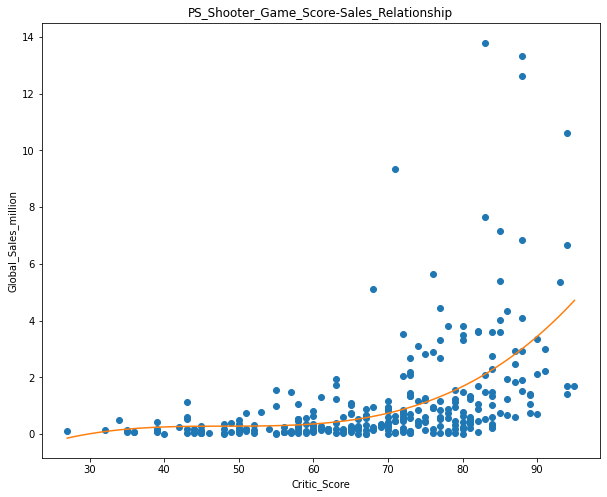

In [33]:
# Check whether the higher sales action or sports game got higher Critic_Score

t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])
t8=t7[pd.notnull(t7['Critic_Score'])]
array1=t8['Critic_Score'].values
array2=t8['Global_Sales_million'].values

z=np.polyfit(x=array1,y=array2,deg=3)
f=np.poly1d(z)
x_new = np.linspace(array1.min(), array1.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(10,8))
plt.plot(array1, array2,'o',x_new,y_new)

plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales_million")
plt.title("PS_Shooter_Game_Score-Sales_Relationship")
plt.show()

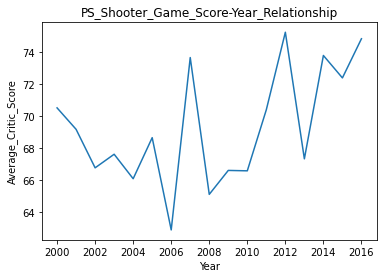

In [34]:
# Check whether the Average Critic_Score of action game or sports game is increased by years.

table1=t8[['Year_of_Release','Critic_Score']].groupby(['Year_of_Release']).mean().reset_index()
array1 = table1['Year_of_Release'].values
array2 = table1['Critic_Score'].values
plt.plot(array1,array2)
plt.xlabel("Year")
plt.ylabel("Average_Critic_Score")
plt.title("PS_Shooter_Game_Score-Year_Relationship")
plt.show()

## Conclusion: The Average Critic_Score didn't changed a lot throughout the Year_of_Release, so there is 
## no significant relationship between percentage weight of a genre game and the Critic_Score

From the first graph, it is obvious to see an increasing trend. This indicates that critic score has a positive effect on global sales weight of shooter games. It is hard to tell the trend of critic score over time from the second graph. However, from the pie graphs, we observe an increasing trend of the proportion of the shooter game over PlayStation platforms (PS2 -> PS4, as time increases). These two results contradict with each other. Therefore, we cannot tell that the result we get is statically significant. 

** _User Score VS Global Sales_ **

We plot a graph with linear regression line to see the relationship of global sales weight and user score. 

/tmp/ipykernel_70/1694817397.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])
/tmp/ipykernel_70/1694817397.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])


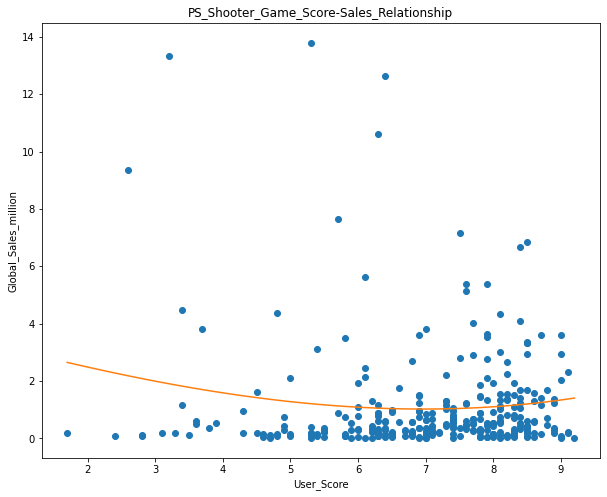

In [35]:
t7=t1[t1['Genre'] == 'Shooter'].append(t5[t5['Genre'] == 'Shooter']).append(t6[t6['Genre'] == 'Shooter'])
t8=t7[pd.notnull(t7['User_Score'])]
array1=t8['User_Score'].values
array2=t8['Global_Sales_million'].values

z=np.polyfit(x=array1,y=array2,deg=3)
f=np.poly1d(z)
x_new = np.linspace(array1.min(), array1.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(10,8))
plt.plot(array1, array2,'o',x_new,y_new)

plt.xlabel("User_Score")
plt.ylabel("Global_Sales_million")
plt.title("PS_Shooter_Game_Score-Sales_Relationship")
plt.show()

We can see that that the regression line is concaving up slightly. Comparing with the effect of critic score, the user score has less influence on global sales weight of shooter games on PlayStation platforms. It is also hard to figure out the distribution of the dots on the graph. Therefore, we can conclude that user score has relatively no effect on global sales weight of shooter games.

## Linear Regression Model

After analyzing the data, the other we could do is to test our result of trend. We will make a linear regression model to see how the global sales would change depending on the following variables: North America sales, EU sales, JP sales, sales from other country and the critic score. We only count the critic sales and not include the user score since we have proved that user score has a relatively small impact on the global sales. Also, we waant to see that the effect of the critic score is statically significant. Below, the steps how to make a linear regression model for the shooter game will be presented.

In [36]:
import statsmodels.formula.api as sm

#take out necessary data for the regression
table_action = t8.loc[t8['Genre'] == 'Shooter'][['NA_Sales_million', 'EU_Sales_million', 'JP_Sales_million', 
                                                'Other_Sales_million', 'Global_Sales_million', 'Critic_Score']]

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


#### Linear regression model for action games:

In [37]:
result_action = sm.ols(formula="Global_Sales_million ~ NA_Sales_million+EU_Sales_million+JP_Sales_million+Other_Sales_million \
                      +Critic_Score",  data=table_action).fit()

result_action.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Global_Sales_million   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 5.281e+06
Date:                  Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                          23:57:33   Log-Likelihood:                 1026.4
No. Observations:                   282   AIC:                            -2041.
Df Residuals:                       276   BIC:                            -2019.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.669e-05      0.002      0.028      0.977      -0.004       0.004
NA_Sales_million        0.9995      0.001    823.068      0.000       0.997       1.002
EU_Sales_million        1.0014      0.002    439.184      0.000       0.997       1.006
JP_Sales_million        1.0044      0.005    191.647      0.000       0.994       1.015
Other_Sales_million     0.9941      0.007    146.686      0.000       0.981       1.007
Critic_Score         5.183e-06   2.97e-05      0.175      0.861   -5.32e-05    6.36e-05
==============================================================================
Omnibus:                        1.627   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.548
Skew:                           0.089   Prob(JB):                        0.461
Kurtosis:                       2.683   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the models above, it is obvious to see the relationship between global sales and other variables. The coefficient and the p value is the key point on the significance of the independent variables. People can tell whether a variable has a positive or negative effect on global sales by the sign of the coefficient, and figure out how much it affects from the magnitude. However, we also have to see the p value and f-statistic to see if the result is statistically significant. The following would be some simple conclusion we could get from the two models:

1.	More sales in different regions will generally boost global sales for both 2 genres of games
2.	For sports game, sales in main region have bigger influence while sales in other regions have bigger influence for action games.
3.	Critic score also seems to have a very small effect on global sales. And both p values are greater than 0.05, which means there are not statistically significant. People can conclude that there is no main effect of critic score on global sales.
4.	In conclusion, we can assume that for different genre of games, selling strategy might vary based on the regression model.


## References and Resources

The following links provide further description of data visualization and adjustment in python. Besides, more details about gaming market are provided for people who want to know more about it.

1. Video Game Sales with Ratings: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
2. Loading A CSV Into Pandas: https://chrisalbon.com/python/pandas_dataframe_importing_csv.html 
3. Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html
4. Matplotlib Pie chart: https://pythonspot.com/en/matplotlib-pie-chart/
5. Linear Regression: http://www.statsmodels.org/stable/regression.html
6. Global Gaming Market Report: https://newzoo.com/insights/articles/global-games-market-reaches-99-6-billion-2016-mobile-generating-37/
